In [5]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [6]:
import numpy as np 
import keras
import pandas as pd 
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from pathlib import Path
from glob import glob
%matplotlib inline 

## Data Exploration

In [7]:
all_scans_df = pd.DataFrame(dict(path = glob(os.path.join('MURA-v1.1', '*', '*', '*', '*', '*.png'))))
all_scans_df['TrainSplit'] = all_scans_df['path'].map(lambda x: x.split('/')[2])
all_scans_df['Region'] = all_scans_df['path'].map(lambda x: x.split('/')[-4])
all_scans_df['Patient'] = all_scans_df['path'].map(lambda x: x.split('/')[-3])
all_scans_df['FolderId'] = all_scans_df['path'].map(lambda x: x.split('/')[-2])
all_scans_df['Study'] = all_scans_df['FolderId'].map(lambda x: x.split('_')[0])
all_scans_df['class'] = all_scans_df['FolderId'].map(lambda x: x.split('_')[-1] if '_' in x else np.NAN )
all_scans_df

,path,TrainSplit,Region,Patient,FolderId,Study,class
0,MURA-v1.1/valid/XR_HAND/patient11599/study1_ne...,XR_HAND,XR_HAND,patient11599,study1_negative,study1,negative
1,MURA-v1.1/valid/XR_HAND/patient11599/study1_ne...,XR_HAND,XR_HAND,patient11599,study1_negative,study1,negative
2,MURA-v1.1/valid/XR_HAND/patient11304/study1_po...,XR_HAND,XR_HAND,patient11304,study1_positive,study1,positive
3,MURA-v1.1/valid/XR_HAND/patient11304/study1_po...,XR_HAND,XR_HAND,patient11304,study1_positive,study1,positive
4,MURA-v1.1/valid/XR_HAND/patient11304/study1_po...,XR_HAND,XR_HAND,patient11304,study1_positive,study1,positive
5,MURA-v1.1/valid/XR_HAND/patient11552/study1_ne...,XR_HAND,XR_HAND,patient11552,study1_negative,study1,negative
6,MURA-v1.1/valid/XR_HAND/patient11552/study1_ne...,XR_HAND,XR_HAND,patient11552,study1_negative,study1,negative
7,MURA-v1.1/valid/XR_HAND/patient11552/study1_ne...,XR_HAND,XR_HAND,patient11552,study1_negative,study1,negative
8,MURA-v1.1/valid/XR_HAND/patient11555/study1_ne...,XR_HAND,XR_HAND,patient11555,study1_negative,study1,negative
9,MURA-v1.1/valid/XR_HAND/patient11555/study1_ne...,XR_HAND,XR_HAND,patient11555,study1_negative,study1,negative


In [8]:
(all_scans_df[all_scans_df['Region']=='XR_FOREARM'])['class'].value_counts()

negative    1314
positive     812
Name: class, dtype: int64

In [9]:
all_scans_df['Region'].unique()

array(['XR_HAND', 'XR_HUMERUS', 'XR_FINGER', 'XR_ELBOW', 'XR_SHOULDER',
       'XR_WRIST', 'XR_FOREARM'], dtype=object)

In [10]:
all_scans_df.shape

(40004, 7)

In [11]:
df_train_split = pd.DataFrame(dict(filename = glob(os.path.join('MURA-v1.1', 'train', '*', '*', '*', '*.png'))))
df_train_split['TrainSplit'] = df_train_split['filename'].map(lambda x: x.split('/')[2])
df_train_split['Region'] = df_train_split['filename'].map(lambda x: x.split('/')[-4])
df_train_split['Patient'] = df_train_split['filename'].map(lambda x: x.split('/')[-3])
df_train_split['FolderId'] = df_train_split['filename'].map(lambda x: x.split('/')[-2])
df_train_split['Study'] = df_train_split['FolderId'].map(lambda x: x.split('_')[0])
df_train_split['class'] = df_train_split['FolderId'].map(lambda x: x.split('_')[-1] if '_' in x else np.NAN )
df_train_split.shape

(36807, 7)

In [12]:
for region in df_train_split.Region.unique():
    data=df_train_split[df_train_split.Region==region ]
    print(region, data.shape[0])
    print(data.groupby('class')['filename'].nunique())
    print(data[data['class']=='negative'].shape[0]/data[data['class']=='positive'].shape[0])
    print()

XR_HAND 5543
class
negative    4059
positive    1484
Name: filename, dtype: int64
2.7351752021563343

XR_HUMERUS 1272
class
negative    673
positive    599
Name: filename, dtype: int64
1.1235392320534223

XR_FINGER 5105
class
negative    3137
positive    1968
Name: filename, dtype: int64
1.5940040650406504

XR_ELBOW 4931
class
negative    2925
positive    2006
Name: filename, dtype: int64
1.4581256231306081

XR_SHOULDER 8379
class
negative    4211
positive    4168
Name: filename, dtype: int64
1.01031669865643

XR_WRIST 9752
class
negative    5765
positive    3987
Name: filename, dtype: int64
1.4459493353398545

XR_FOREARM 1825
class
negative    1164
positive     661
Name: filename, dtype: int64
1.7609682299546143



In [13]:
dataset_root = Path('MURA-v1.1')
def generate_df(dataset_root, csv_name):
    df = pd.read_csv(dataset_root/csv_name, header=None, names=['filename'])
    df['class'] = (df.filename.str.extract('study.*_(positive|negative)'))
    return df
df_train=generate_df(dataset_root,'train_image_paths.csv')
df_valid=generate_df(dataset_root, 'valid_image_paths.csv')

In [14]:
df_train.head()

,filename,class
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive


## Data Sampling

In [15]:
df_train_sample=pd.DataFrame(columns=['filename','TrainSplit','Region','Patient','FolderId','Study','class'])
for region in df_train_split['Region'].unique():
    pos=df_train_split[(df_train_split['Region']==region) & (df_train_split['class']=='positive')]
    neg=df_train_split[(df_train_split['Region']==region) & (df_train_split['class']=='negative')]
    pos_num=pos.shape[0]
    neg_num=neg.shape[0]
    if pos_num<neg_num:
        df_train_sample=pd.concat([df_train_sample,pos],axis=0)
        sample_data=neg.sample(pos_num)
    else:
        df_train_sample=pd.concat([df_train_sample,neg],axis=0)
        sample_data=pos.sample(pos_num)
    df_train_sample=pd.concat([df_train_sample,sample_data],axis=0)
df_train_sample.shape

(29746, 7)

In [16]:
df_train_sample.head(5)

,filename,TrainSplit,Region,Patient,FolderId,Study,class
14,MURA-v1.1/train/XR_HAND/patient09754/study1_po...,XR_HAND,XR_HAND,patient09754,study1_positive,study1,positive
15,MURA-v1.1/train/XR_HAND/patient09754/study1_po...,XR_HAND,XR_HAND,patient09754,study1_positive,study1,positive
18,MURA-v1.1/train/XR_HAND/patient00276/study1_po...,XR_HAND,XR_HAND,patient00276,study1_positive,study1,positive
19,MURA-v1.1/train/XR_HAND/patient00276/study1_po...,XR_HAND,XR_HAND,patient00276,study1_positive,study1,positive
20,MURA-v1.1/train/XR_HAND/patient00276/study1_po...,XR_HAND,XR_HAND,patient00276,study1_positive,study1,positive


## Build Data Generator

In [17]:
#data augmentation
idg_train_settings = dict(samplewise_center = True,
                         samplewise_std_normalization = True,
                          rotation_range = 10, #from 0 to 360
                          width_shift_range = 1, 
                         height_shift_range = 1,
                         zoom_range = 0.3,
                         horizontal_flip = True,
                         vertical_flip = True)
train_gen = ImageDataGenerator(**idg_train_settings)
idg_valid_settings = dict(samplewise_center = True,
                         samplewise_std_normalization = True,
                          rotation_range = 0, 
                          width_shift_range = 0., 
                         height_shift_range = 0.,
                         zoom_range = 0.0, 
                         horizontal_flip = False,
                         vertical_flip = False)
valid_gen = ImageDataGenerator(**idg_valid_settings)

In [18]:
#create iterator
train_it = train_gen.flow_from_dataframe(df_train_sample, 
                                          directory=dataset_root.parent,
                                          target_size=(128, 128), batch_size=64, 
                                          class_mode='binary')
valid_it = valid_gen.flow_from_dataframe(generate_df(dataset_root, 'valid_image_paths.csv'), 
                                          directory=dataset_root.parent,
                                          target_size=(128, 128), batch_size=64,
                                          class_mode='binary',shuffle = False)
a, b = next(train_it)
#The next() function returns the next item in an iterator. 
print(a.shape, a.mean(), a.min(), a.max())
print(b.shape)
print(train_it.class_indices)
print(valid_it.class_indices)

Found 29746 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.
(64, 128, 128, 3) 1.3814618e-08 -3.009031 18.251993
(64,)
{'negative': 0, 'positive': 1}
{'negative': 0, 'positive': 1}


## Build CNN model (VGG16)

In [19]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input,Flatten,Dense,Dropout,GlobalAveragePooling2D
from keras.models import Sequential,Model
from keras import optimizers

base = VGG16(weights ='imagenet',input_shape=a.shape[1:],include_top=False)
x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid', name='predictions')(x)
# define new model
vgg = Model(input=base.input, output=predictions)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  del sys.path[0]


In [20]:
vgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [21]:
# vgg_unfreeze
vgg_unfreeze_b5=vgg
vgg_unfreeze_b5.trainable = True

set_trainable = False
for layer in vgg_unfreeze_b5.layers:
    if layer.name  == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in vgg_unfreeze_b5.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [24]:
vgg_unfreeze_b5.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics = ['accuracy'])


In [25]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
file_path_vgg="VGG_unfreeze_b5.weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint_vgg = ModelCheckpoint(file_path_vgg, monitor='val_loss', 
                             verbose=2, save_best_only=False, mode='min')
early_vgg = EarlyStopping(monitor="val_acc", mode="max", patience=3)
callbacks_list_vgg = [checkpoint_vgg, early_vgg] 

In [ ]:
vgg_unfreeze_b5.fit_generator(train_it, 
                    steps_per_epoch = df_train_sample.shape[0]//a.shape[0],
                    validation_data = valid_it,
                    validation_steps = df_valid.shape[0]//a.shape[0],
                    epochs=15,
                   callbacks = callbacks_list_vgg)

Epoch 1/15
464/464 [==============================] - 8091s 17s/step - loss: 0.6160 - accuracy: 0.6519 - val_loss: 0.6473 - val_accuracy: 0.7264

Epoch 00001: saving model to VGG_unfreeze_b5.weights.01-0.65.hdf5


/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/15
464/464 [==============================] - 8094s 17s/step - loss: 0.5593 - accuracy: 0.7129 - val_loss: 0.5843 - val_accuracy: 0.7411

Epoch 00002: saving model to VGG_unfreeze_b5.weights.02-0.58.hdf5
Epoch 3/15
464/464 [==============================] - 8125s 18s/step - loss: 0.5464 - accuracy: 0.7196 - val_loss: 0.5591 - val_accuracy: 0.7514

Epoch 00003: saving model to VGG_unfreeze_b5.weights.03-0.56.hdf5
Epoch 4/15
464/464 [==============================] - 8112s 17s/step - loss: 0.5331 - accuracy: 0.7307 - val_loss: 0.7761 - val_accuracy: 0.7312

Epoch 00004: saving model to VGG_unfreeze_b5.weights.04-0.78.hdf5
Epoch 5/15
464/464 [==============================] - 8110s 17s/step - loss: 0.5277 - accuracy: 0.7356 - val_loss: 0.4821 - val_accuracy: 0.7341

Epoch 00005: saving model to VGG_unfreeze_b5.weights.05-0.48.hdf5
Epoch 6/15
178/464 [==========>...................] - ETA: 1:16:52 - loss: 0.5134 - accuracy: 0.7461

## Model Evaluation

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import binarize
from keras.models import load_model
network=vgg_unfreeze_b5
network.load_weights("VGG_unfreeze_b5.weights.05-0.48.hdf5")
Y_prob = network.predict_generator(valid_it)

In [28]:
Y_pred= binarize(Y_prob, 0.5)
print('Confusion Matrix')
true_classes = valid_it.classes
print(confusion_matrix(true_classes, Y_pred))

print('Classification Report')
class_labels=list(valid_it.class_indices.keys())
report = classification_report(true_classes, Y_pred, target_names=class_labels)
print(report) 

Confusion Matrix
[[1210  457]
 [ 401 1129]]
Classification Report
              precision    recall  f1-score   support

    negative       0.75      0.73      0.74      1667
    positive       0.71      0.74      0.72      1530

    accuracy                           0.73      3197
   macro avg       0.73      0.73      0.73      3197
weighted avg       0.73      0.73      0.73      3197



Text(0, 0.5, 'True Positive Rate')

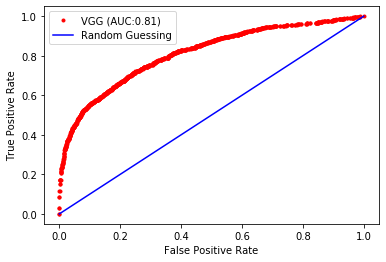

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(true_classes, Y_prob)
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r.', label = 'VGG (AUC:%2.2f)' % roc_auc_score(true_classes, Y_prob))
ax1.plot(fpr, fpr, 'b-', label = 'Random Guessing')
ax1.legend()
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')